<a href="https://colab.research.google.com/github/jenelaineDC/Master-Time-Series-Analysis-Forecasting/blob/main/Amazon%20AutoGluon/Amazon_Autogluon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Amazon Autogluon

[Documentation](https://auto.gluon.ai/stable/index.html)


Amazon autogluon is a robust AutoML toolkit that simplifies model building by automating these processes (Data Preprocessing, Hyperparameter tuning, Model Selection).

Autogluon lets you do it without deep expertise (Raw Data to Trained Model).

Autogluon is a versatile took that supports many machine learning tasks including (Image Classification, Text Analysis, Tabular Data Modeling).

It excels at automatically selecting and combining models, using advanced techniques to find the best performers without manual tuning.

Users can also tweak everything from hyperparameters to custom models, making it a powerful took with tons of flexibility.

**Presets for TS Forecasting:**
1. fast_training:
- Fast results,
- Incudes simple statistical models + some fast tree based models
- Prioritizes speed, but may sacrifice some accuracy
- Best for rapid prototypes or limited resources
2. medium_quality (default):
- Includes temporal fusion transformer + models from "fast_training"
- Balances training time and forecast accuracy
- Ideal for decent accuracy short training time
- Ideal for projects needing precise forecast
3. best_quality:
- Provides maximum forecast accuracy
- Includes all models from "high_quality"
- Highest accuracy but longest training time
- Best for high-stakes forecasting



### SET-UP

In [7]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
%cd /content/drive/MyDrive/Python - Time Series Forecasting/Advanced Content for Time Series/Amazon AutoGluon

/content/drive/MyDrive/Python - Time Series Forecasting/Advanced Content for Time Series/Amazon AutoGluon


In [3]:
# Install the autogluon library
!pip install -q autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 18.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.1/225.1 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.9/454.9 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.3/487.3 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.7/189.7 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.0/71.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 10.7 MB/s eta 0:0

In [4]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
from autogluon.timeseries.splitter import ExpandingWindowSplitter

The goal is to predict the number of library visitors in Autralian Cities.

In [12]:
df = pd.read_csv("australia_library_data.csv")
df.head()

,datetime,location_name,no_of_people,day_of_week,temperature,rainfall,event_day
0,2024-06-01 00:00:00,Sydney,3,5,14.811082,0,1
1,2024-06-01 01:00:00,Sydney,3,5,15.545415,0,1
2,2024-06-01 02:00:00,Sydney,3,5,15.585101,0,1
3,2024-06-01 03:00:00,Sydney,3,5,14.263018,1,1
4,2024-06-01 04:00:00,Sydney,4,5,15.611136,1,1


### EDA

In [13]:
# Rename target variable to y
df.rename(columns={'no_of_people': 'y'}, inplace = True)
df.head()

,datetime,location_name,y,day_of_week,temperature,rainfall,event_day
0,2024-06-01 00:00:00,Sydney,3,5,14.811082,0,1
1,2024-06-01 01:00:00,Sydney,3,5,15.545415,0,1
2,2024-06-01 02:00:00,Sydney,3,5,15.585101,0,1
3,2024-06-01 03:00:00,Sydney,3,5,14.263018,1,1
4,2024-06-01 04:00:00,Sydney,4,5,15.611136,1,1


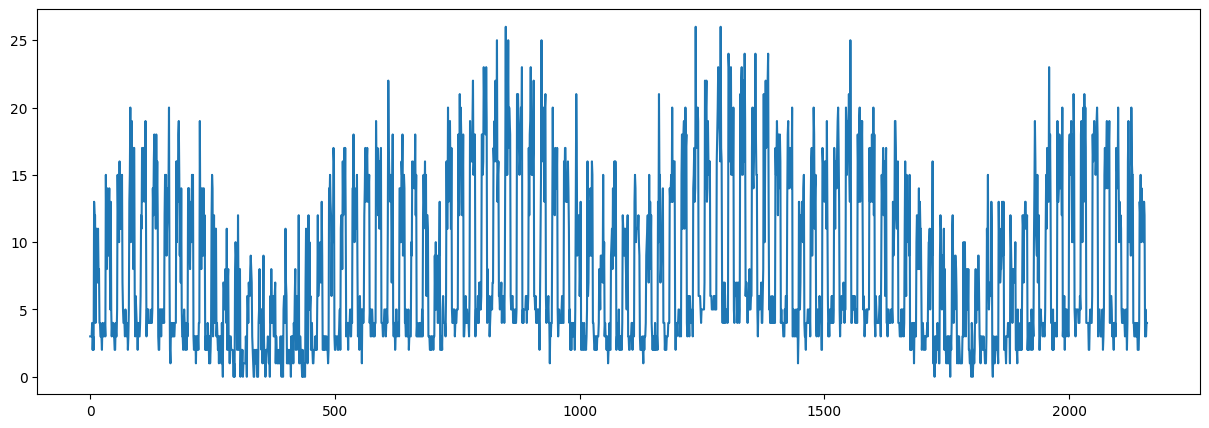

In [14]:
# Plot y
df.y.plot(figsize= ( 15,5))
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       2160 non-null   object 
 1   location_name  2160 non-null   object 
 2   y              2160 non-null   int64  
 3   day_of_week    2160 non-null   int64  
 4   temperature    2160 non-null   float64
 5   rainfall       2160 non-null   int64  
 6   event_day      2160 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 118.3+ KB


In [16]:
# Check unique values in location
df.location_name.unique()

array(['Sydney', 'Melbourne', 'Brisbane'], dtype=object)

In [17]:
# Convert df into a TimeSeriesDataFrame object
timeseries_df = TimeSeriesDataFrame.from_data_frame(
    df,
    id_column = 'location_name',
    timestamp_column = "datetime"
    )

timeseries_df.tail()

y  day_of_week  temperature  rainfall  event_day
item_id  timestamp                                                            
Brisbane 2024-06-30 19:00:00  3            6    13.413679         0          0
         2024-06-30 20:00:00  5            6    16.786890         0          0
         2024-06-30 21:00:00  3            6    14.566363         0          0
         2024-06-30 22:00:00  4            6    14.387770         1          0
         2024-06-30 23:00:00  4            6    16.239709         0          0

In [18]:
prediction_length = 216

# we based this value based on the availability of our covariates in our future data frame
# please see australia_library_future

### AutoGluon - Base Model

#### Fit the Model

In [19]:
# Initialize the TimeSeriesPredictor with essential parameters
predictor = TimeSeriesPredictor(
    prediction_length = prediction_length,    #forecast horizon
    target = 'y',                             #target variable
    eval_metric = 'RMSE',                     #evaluation metric
    freq = "h"                                #frequency
    )

In [20]:
# Train the model with specified presets, validation steps, and time limits
predictor.fit(
    timeseries_df,                            #timeseries object
    presets = 'best_quality',                 #preset
    val_step_size = 96,                       #step size
    random_seed = 1502,                       #random seed for reproducibility
    num_val_windows = 50,
    time_limit = 600
)

Beginning AutoGluon training... Time limit = 600s
AutoGluon will save models to '/content/drive/MyDrive/Python - Time Series Forecasting/Advanced Content for Time Series/Amazon AutoGluon/AutogluonModels/ag-20250924_061959'
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Sep  6 09:54:41 UTC 2025
CPU Count:          2
GPU Count:          0
Memory Avail:       11.12 GB / 12.67 GB (87.7%)
Disk Space Avail:   27.01 GB / 100.00 GB (27.0%)
Setting presets to: best_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': RMSE,
 'freq': 'h',
 'hyperparameters': 'default',
 'known_covariates_names': [],
 'num_val_windows': 50,
 'prediction_length': 216,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 1502,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/821M [00:00<?, ?B/s]

	-3.8841       = Validation score (-RMSE)
	58.09   s     = Training runtime
	13.38   s     = Validation (prediction) runtime
Training timeseries model ChronosFineTuned[bolt_small]. Training for up to 82.5s of the 494.9s of remaining time.
	Skipping covariate_regressor since the dataset contains no known_covariates or static_features.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/191M [00:00<?, ?B/s]

	Fine-tuning on the CPU detected. We recommend using a GPU for faster fine-tuning of Chronos.
	Saving fine-tuned model to /content/drive/MyDrive/Python - Time Series Forecasting/Advanced Content for Time Series/Amazon AutoGluon/AutogluonModels/ag-20250924_061959/models/ChronosFineTuned[bolt_small]/W0/fine-tuned-ckpt
	Skipping covariate_regressor since the dataset contains no known_covariates or static_features.
	Fine-tuning on the CPU detected. We recommend using a GPU for faster fine-tuning of Chronos.
	Saving fine-tuned model to /content/drive/MyDrive/Python - Time Series Forecasting/Advanced Content for Time Series/Amazon AutoGluon/AutogluonModels/ag-20250924_061959/models/ChronosFineTuned[bolt_small]/W1/fine-tuned-ckpt
	Skipping covariate_regressor since the dataset contains no known_covariates or static_features.
	Fine-tuning on the CPU detected. We recommend using a GPU for faster fine-tuning of Chronos.
	Saving fine-tuned model to /content/drive/MyDrive/Python - Time Series Fore

In [21]:
# List the model names
predictor.model_names()

['SeasonalNaive',
 'RecursiveTabular',
 'DirectTabular',
 'NPTS',
 'DynamicOptimizedTheta',
 'AutoETS',
 'ChronosZeroShot[bolt_base]',
 'TemporalFusionTransformer',
 'DeepAR',
 'PatchTST',
 'TiDE',
 'WeightedEnsemble']

#### Model Selection

Metric scores are always shown in "higher is better" format. This means metrics will be multiplied by -1, so their values will be negative.

In [22]:
# Show performance of trained models
predictor.leaderboard()

,model,score_val,pred_time_val,fit_time_marginal,fit_order
0,WeightedEnsemble,-3.346576,3.861294,1.675961,12
1,DynamicOptimizedTheta,-3.629638,0.206875,2.875383,5
2,NPTS,-3.631463,2.588581,5.748534,4
3,ChronosZeroShot[bolt_base],-3.884074,13.376989,58.093234,7
4,SeasonalNaive,-4.155233,0.020744,0.086576,1
5,DirectTabular,-4.349111,0.136382,2.167037,3
6,RecursiveTabular,-4.649663,0.903797,3.746495,2
7,PatchTST,-5.613095,0.052667,78.787902,10
8,DeepAR,-6.039212,2.119993,80.074087,9
9,AutoETS,-6.207156,0.908711,0.998168,6


In generating predictions, the model is not specified in predict, will default to the model with the best validation score.

#### Forecast

In [23]:
# Generate predictions using the trained model
predictions = predictor.predict(timeseries_df, random_seed = 1502)
predictions.head()

Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


mean       0.1       0.2       0.3       0.4  \
item_id timestamp                                                               
Sydney  2024-07-01 00:00:00  2.644343 -0.353778  0.356980  1.341201  2.327706   
        2024-07-01 01:00:00  2.608279 -0.337507  0.601074  1.136273  2.093229   
        2024-07-01 02:00:00  2.727458 -1.019785  0.447863  1.135101  2.198037   
        2024-07-01 03:00:00  2.428037 -1.155369  0.186188  0.910462  1.968514   
        2024-07-01 04:00:00  2.618124 -1.085927 -0.122838  1.051937  2.092766   

                                  0.5       0.6       0.7       0.8       0.9  
item_id timestamp                                                              
Sydney  2024-07-01 00:00:00  2.783822  3.252376  3.721026  4.728364  5.543433  
        2024-07-01 01:00:00  2.560710  3.082316  4.005199  4.599767  5.471145  
        2024-07-01 02:00:00  2.676035  3.194737  4.233317  4.857694  6.285917  
        2024-07-01 03:00:00  2.512546  3.036881  3.598268  4.255131  5.225772  
        2024-07-01 04:00:00  2.662491  3.192802  3.849945  5.027020  6.101819

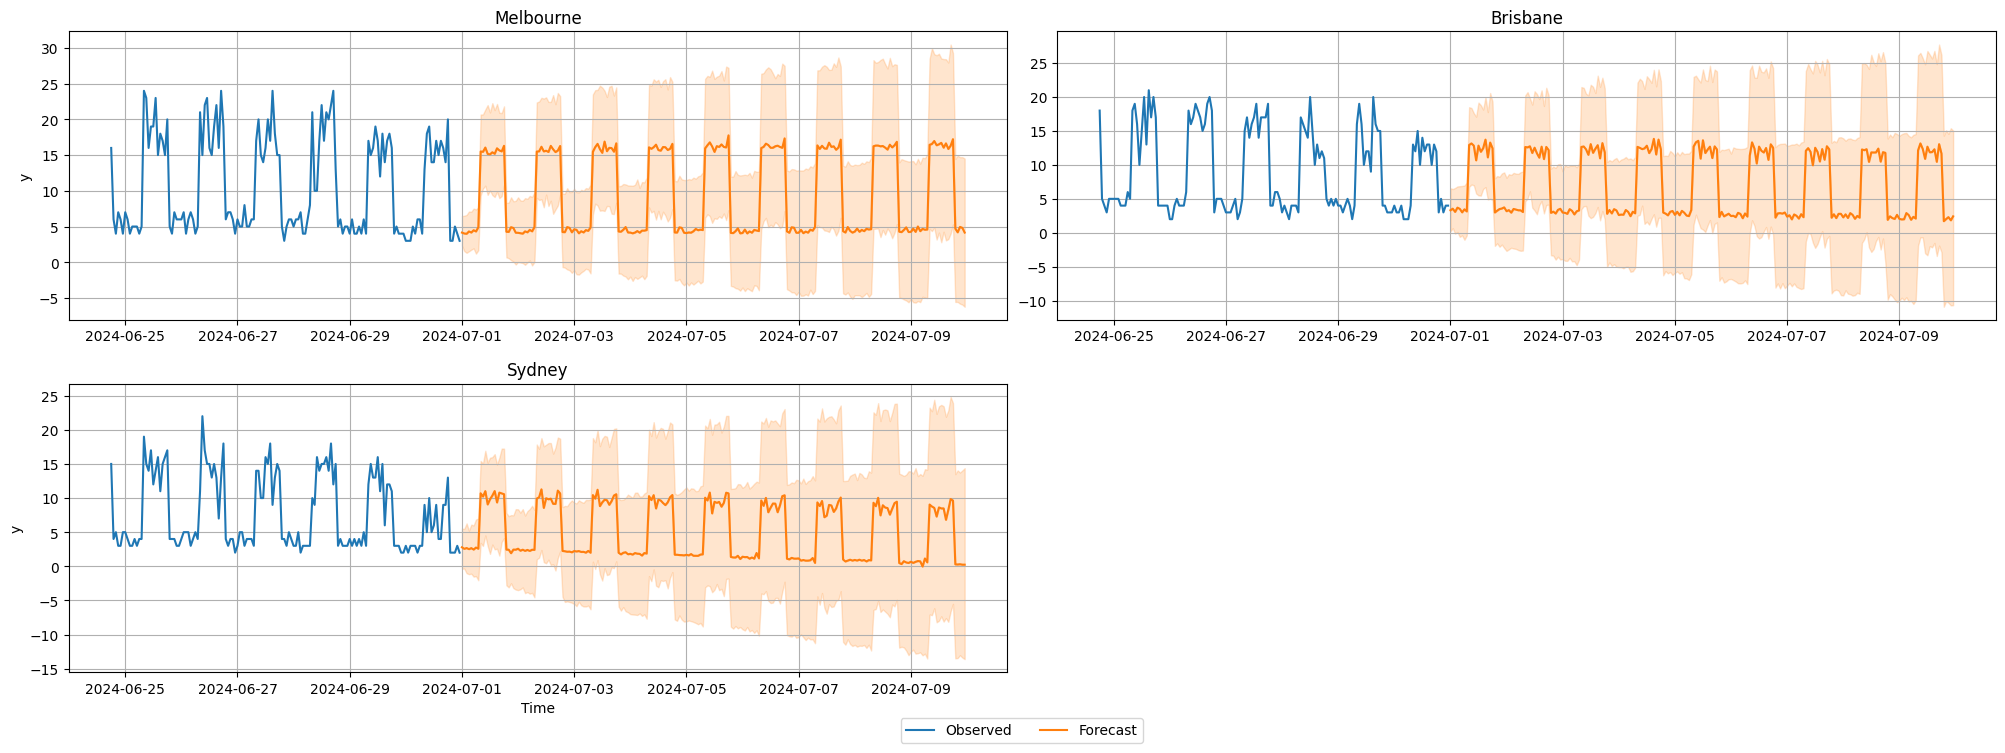

In [24]:
# Plot the actual time series along with the model predictions
predictor.plot(timeseries_df, predictions, max_history_length = 150);

### AutoGluon - Covariates

#### Future Covariates

In [25]:
# Load future covariates
future_covariates = pd.read_csv("australia_library_future.csv")
future_covariates.head()

,datetime,location_name,day_of_week,event_day
0,2024-07-01 00:00:00,Sydney,0,0
1,2024-07-01 01:00:00,Sydney,0,0
2,2024-07-01 02:00:00,Sydney,0,0
3,2024-07-01 03:00:00,Sydney,0,0
4,2024-07-01 04:00:00,Sydney,0,0


In [26]:
# Convert the future covariates DataFrame into a TimeSeriesDataFrame
future_timeseries_df = TimeSeriesDataFrame.from_data_frame(
    future_covariates,
    id_column = 'location_name',
    timestamp_column = "datetime"
    )

future_timeseries_df

day_of_week  event_day
item_id  timestamp                                  
Sydney   2024-07-01 00:00:00            0          0
         2024-07-01 01:00:00            0          0
         2024-07-01 02:00:00            0          0
         2024-07-01 03:00:00            0          0
         2024-07-01 04:00:00            0          0
...                                   ...        ...
Brisbane 2024-07-09 19:00:00            1          1
         2024-07-09 20:00:00            1          1
         2024-07-09 21:00:00            1          1
         2024-07-09 22:00:00            1          1
         2024-07-09 23:00:00            1          1

[648 rows x 2 columns]

#### Fit the Model

In [27]:
# Initialize the TimeSeriesPredictor with known covariates
predictor2 = TimeSeriesPredictor(
    prediction_length = prediction_length,
    target = 'y',
    eval_metric = 'RMSE',
    freq = "h",
    known_covariates_names = ['event_day', 'day_of_week']
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250924_065110"


In [28]:
# Train the model using the covariates
predictor2.fit(
    timeseries_df,
    presets = "best_quality",
    val_step_size = 96,
    random_seed = 1502,
    num_val_windows = 50,
    time_limit = 600
)

Beginning AutoGluon training... Time limit = 600s
AutoGluon will save models to '/content/drive/MyDrive/Python - Time Series Forecasting/Advanced Content for Time Series/Amazon AutoGluon/AutogluonModels/ag-20250924_065110'
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Sep  6 09:54:41 UTC 2025
CPU Count:          2
GPU Count:          0
Memory Avail:       9.58 GB / 12.67 GB (75.6%)
Disk Space Avail:   26.31 GB / 100.00 GB (26.3%)
Setting presets to: best_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': RMSE,
 'freq': 'h',
 'hyperparameters': 'default',
 'known_covariates_names': ['event_day', 'day_of_week'],
 'num_val_windows': 50,
 'prediction_length': 216,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 1502,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_

#### Model Selection

In [29]:
# Display the leaderboard for the new model
predictor2.leaderboard(silent = True)

,model,score_val,pred_time_val,fit_time_marginal,fit_order
0,WeightedEnsemble,-3.346378,4.930609,1.501134,11
1,DynamicOptimizedTheta,-3.629638,0.255222,0.379761,4
2,NPTS,-3.631463,3.959465,4.248617,3
3,ChronosZeroShot[bolt_base],-3.884074,13.112885,24.181893,6
4,SeasonalNaive,-4.155233,0.021554,0.085956,1
5,DirectTabular,-4.351123,0.084249,2.682479,2
6,DeepAR,-5.941249,1.997606,90.195035,8
7,PatchTST,-6.124726,0.050254,87.616841,9
8,AutoETS,-6.207156,0.610118,1.086632,5
9,TemporalFusionTransformer,-6.691978,0.069632,91.233004,7


#### Forecast

In [30]:
# Generate predictions using known covariates
predictions2 = predictor2.predict(
    timeseries_df,
    random_seed = 1502,
    known_covariates = future_timeseries_df)
predictions2.head()

Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


mean       0.1       0.2       0.3       0.4  \
item_id timestamp                                                               
Sydney  2024-07-01 00:00:00  2.637407 -0.363629  0.348129  1.333071  2.320193   
        2024-07-01 01:00:00  2.611390 -0.338518  0.601478  1.137697  2.095525   
        2024-07-01 02:00:00  2.729337 -1.022956  0.446425  1.134914  2.198917   
        2024-07-01 03:00:00  2.433490 -1.155746  0.187812  0.913529  1.972815   
        2024-07-01 04:00:00  2.613877 -1.096692 -0.131365  1.045023  2.087231   

                                  0.5       0.6       0.7       0.8       0.9  
item_id timestamp                                                              
Sydney  2024-07-01 00:00:00  2.776885  3.246015  3.715283  4.723342  5.539411  
        2024-07-01 01:00:00  2.563822  3.086243  4.009998  4.605586  5.478380  
        2024-07-01 02:00:00  2.677913  3.197614  4.237262  4.862889  6.292845  
        2024-07-01 03:00:00  2.517999  3.043487  3.606107  4.264413  5.237055  
        2024-07-01 04:00:00  2.658244  3.189844  3.848365  5.027054  6.104091

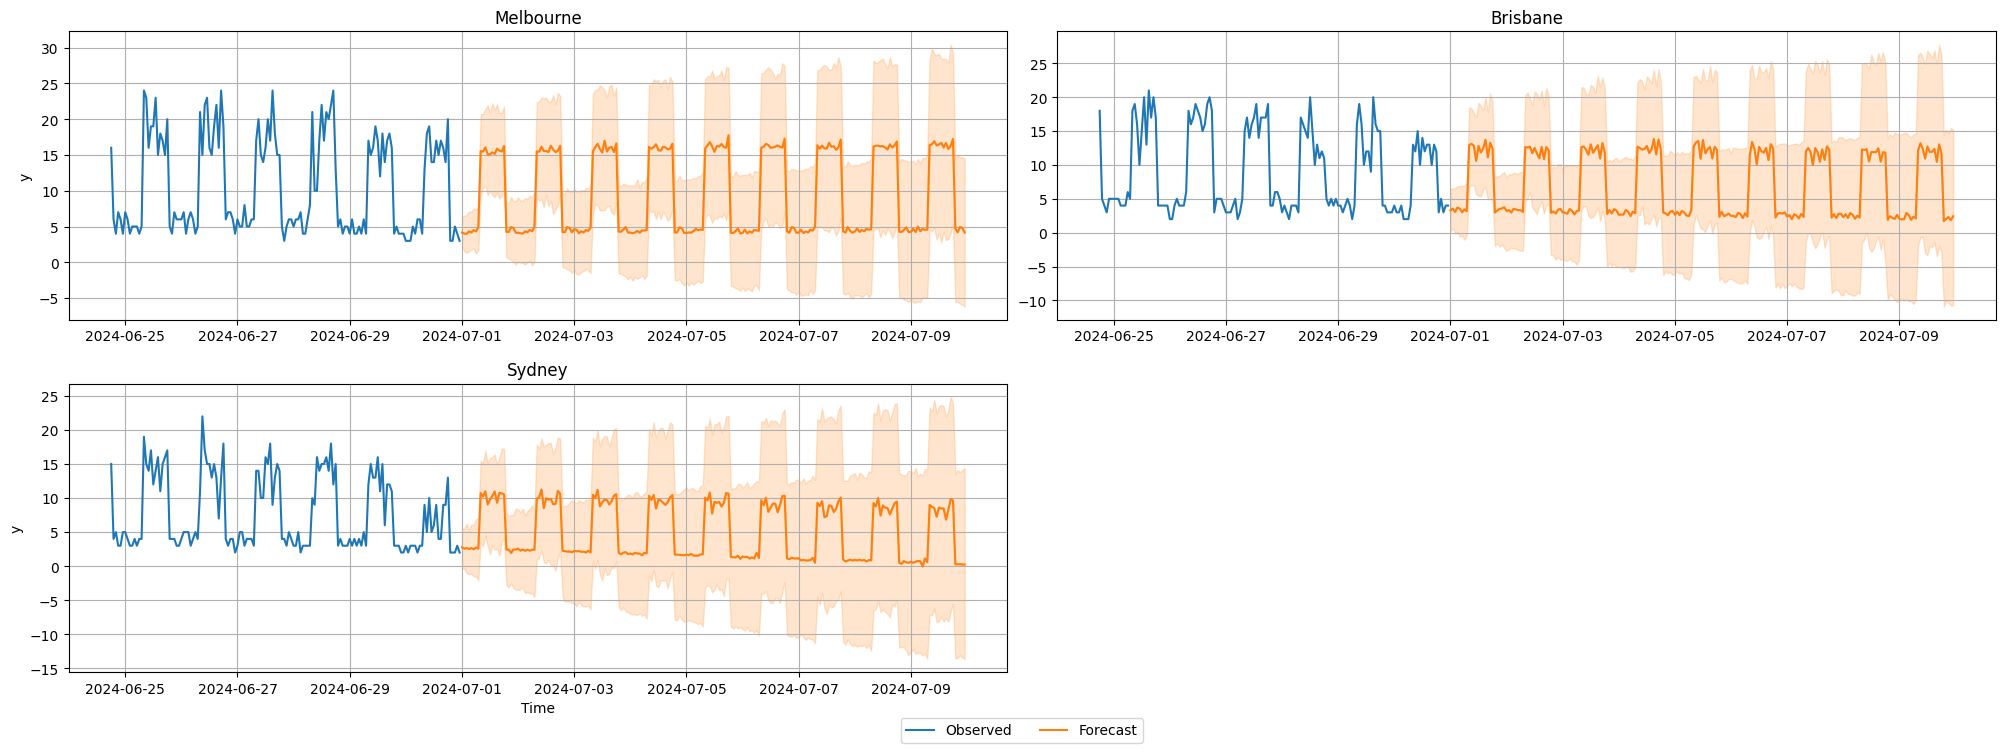

In [31]:
# Plot the actual time series and predictions
predictor2.plot(timeseries_df, predictions2, max_history_length = 150);

#### Feature Importance

In [32]:
# Extract and store the feature importance metrics
feature_importance = predictor2.feature_importance(timeseries_df)

feature_importance

Computing feature importance
Subsample_size 50 is larger than the number of items in the data and will be ignored


,importance,stdev,n,p99_low,p99_high
event_day,0.000902,0.0,5.0,0.000902,0.000902
day_of_week,0.004569,0.0,5.0,0.004569,0.004569
temperature,0.000000,0.0,0.0,NaN,NaN
rainfall,0.000000,0.0,0.0,NaN,NaN


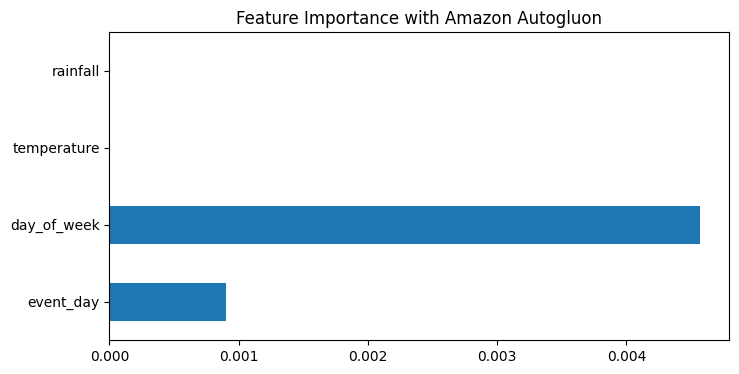

In [34]:
# Feature Importance Plot
feature_importance.importance.plot(kind = 'barh', figsize = (8, 4))
plt.title("Feature Importance with Amazon Autogluon")
plt.show();